Read csv in data using pandas.

In [1]:
import pandas as pd
data = pd.read_csv('Danceability_Prediction_Spotify.csv', sep=',')


Convert columns with String values to numeric values

In [2]:
for c in data.columns:
        data[c] = pd.to_numeric(data[c], errors='coerce')

Normalize the data
Convert all columns in the range of 0 to 1

In [3]:
df_norm = data.sub(data.min()).div((data.max() - data.min()))
data = df_norm
data.dance = data.dance.astype(int)

Determine correlation between features using scatterplot

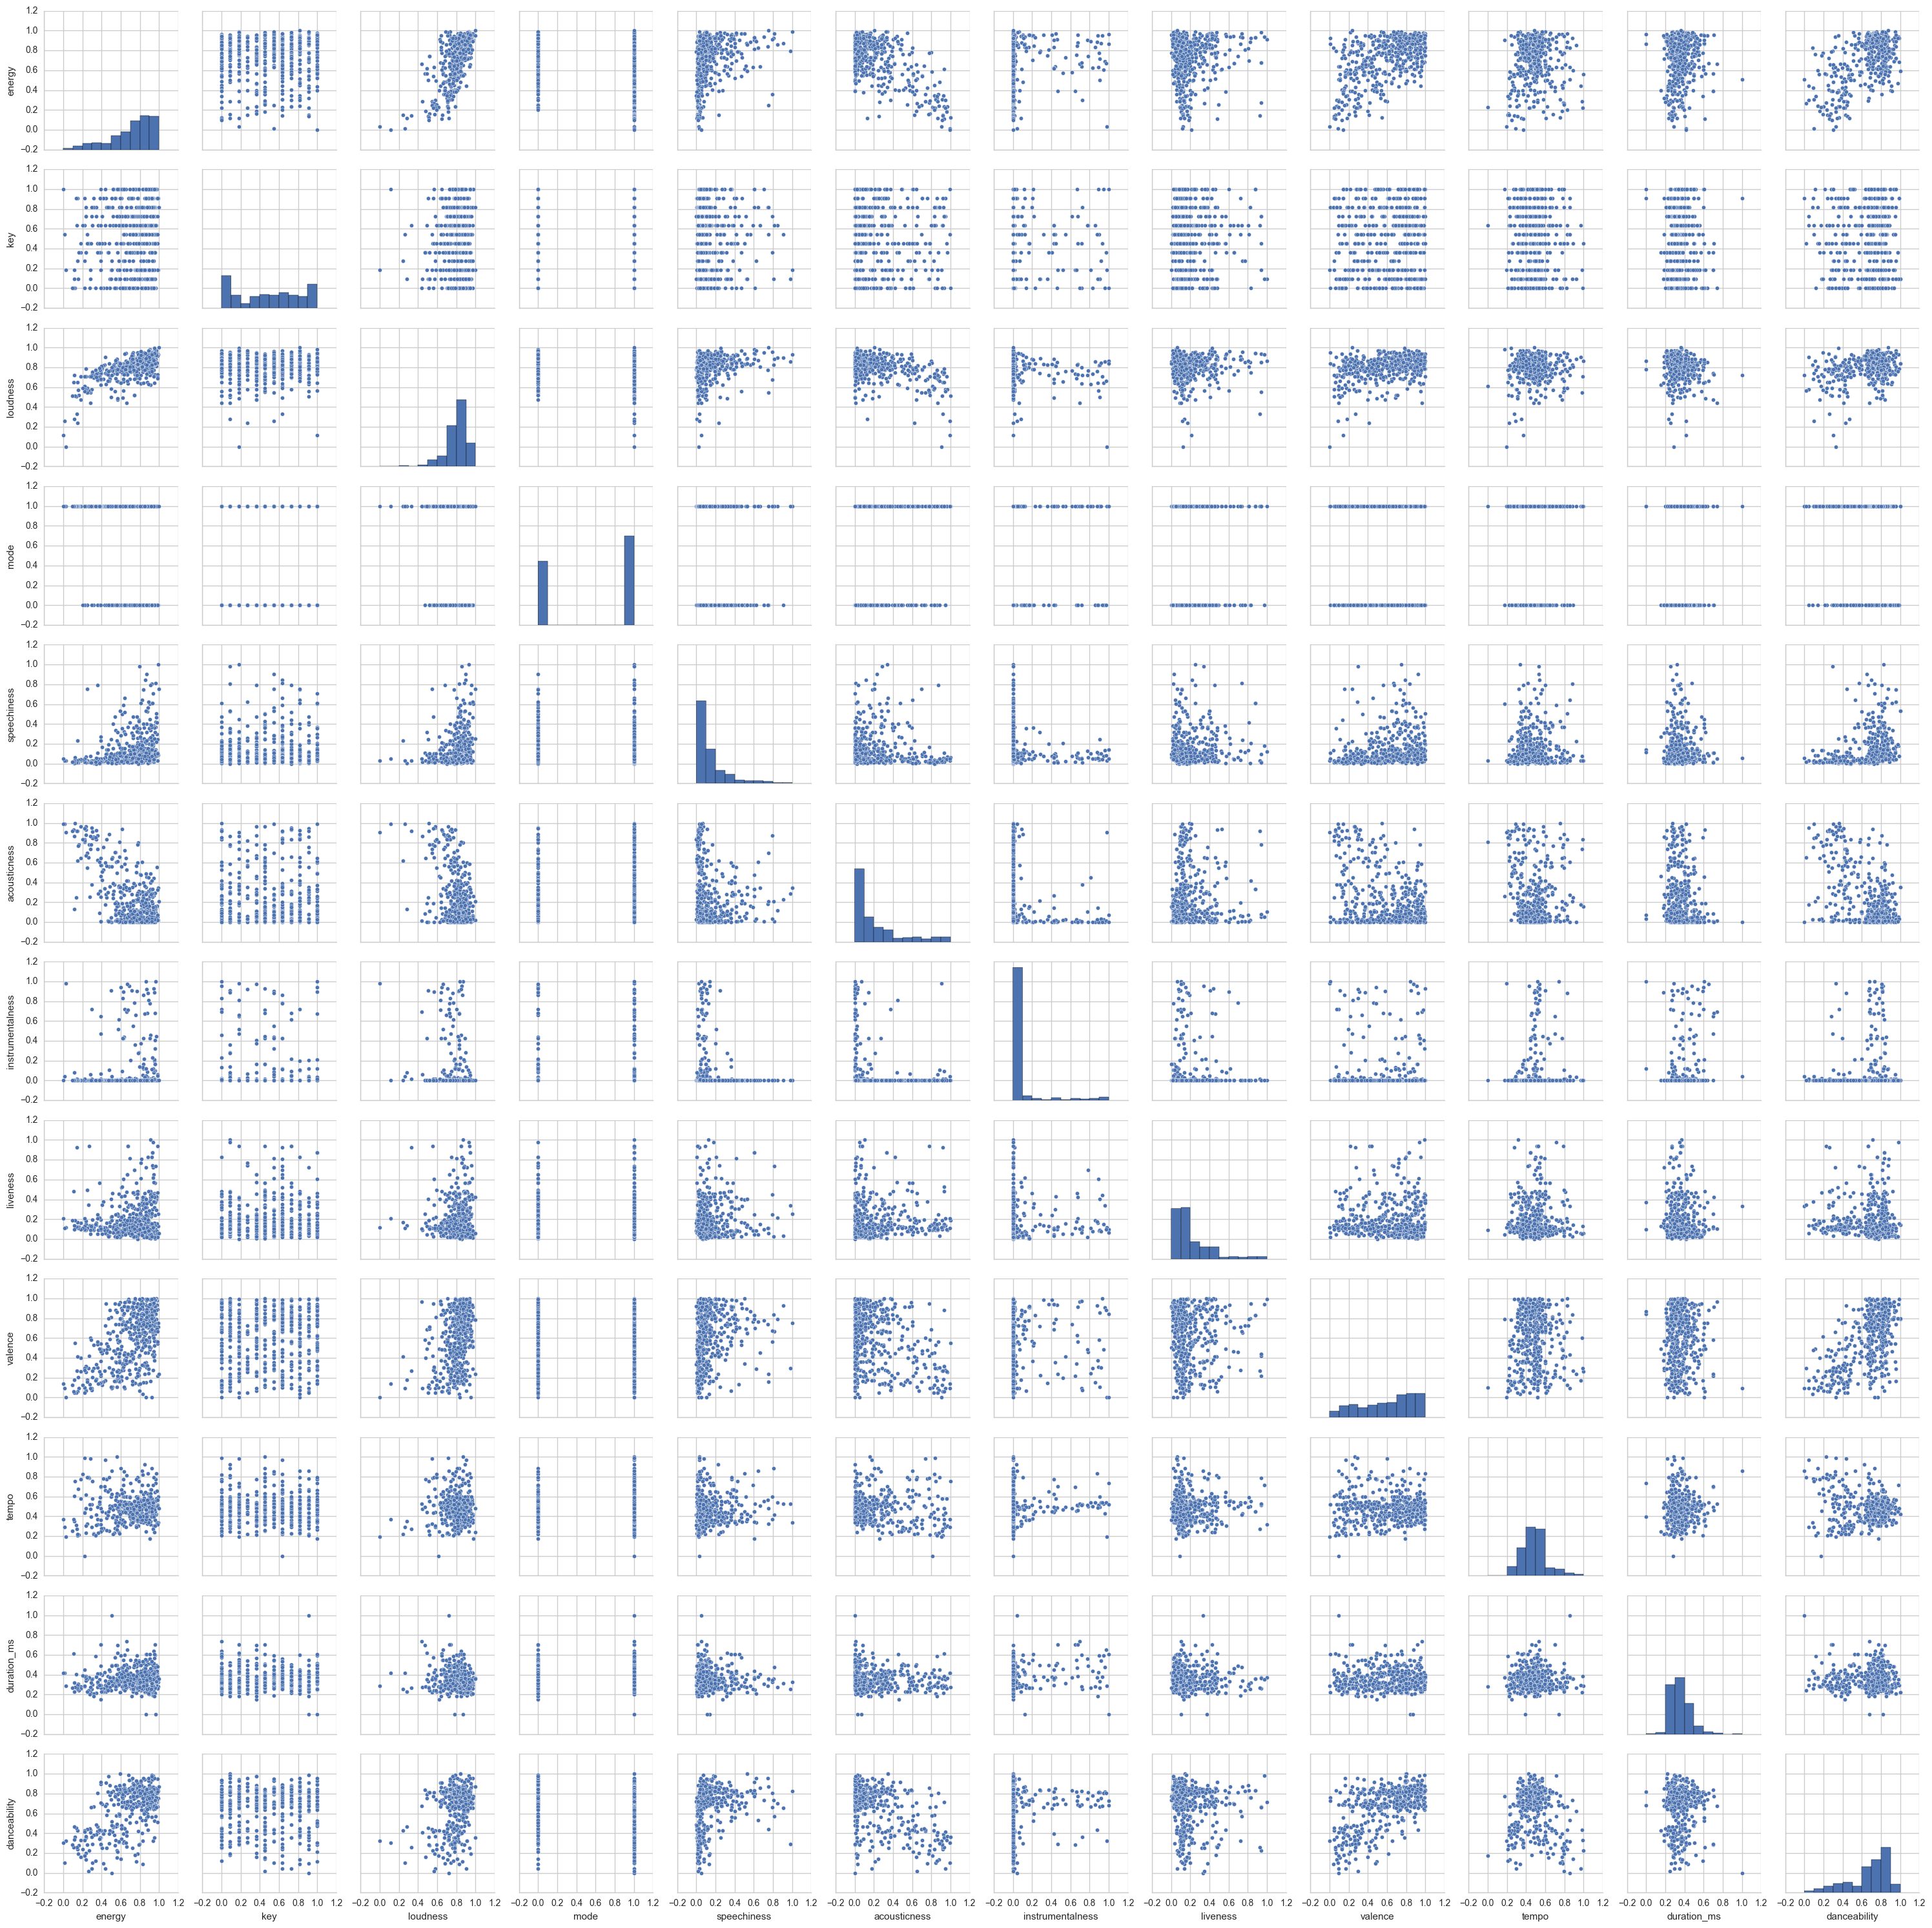

In [4]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
sb.set(style='whitegrid', context='notebook')

columns = ['energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','danceability']
sb.pairplot(data[columns])
plot.show()


Determine correlation between features using Heatmap

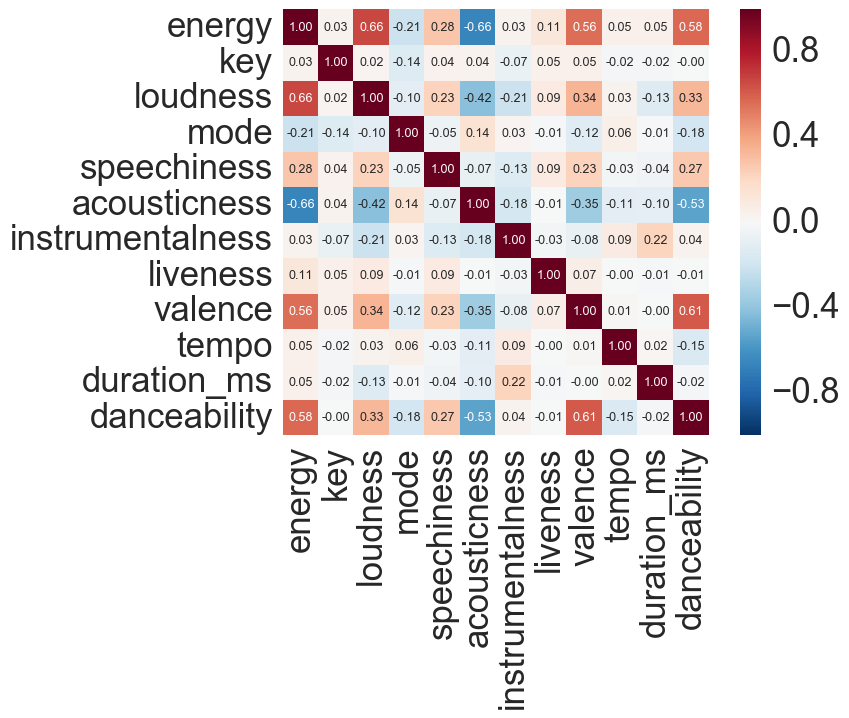

In [5]:
cor_matrix = np.corrcoef(data[columns].values.T)
sb.set(font_scale=2.5)
cor_heat_map = sb.heatmap(cor_matrix, cbar=True, annot=True,square=True,fmt='.2f', annot_kws={'size':9},
yticklabels=columns,
xticklabels=columns)
plot.show()
data.drop('danceability', axis=1, inplace=True)
data.rename(columns={'dance': 'danceability'}, inplace=True)


Determine correlation between features using mean

In [6]:
data.groupby('danceability').mean()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
danceability,,,,,,,,,,,,,,,,,
0,0.641727,0.490538,0.781101,0.636735,0.113298,0.304777,0.069398,0.214520,0.474383,0.495329,NaN,NaN,NaN,NaN,NaN,0.352647,0.721429
1,0.787251,0.486182,0.816555,0.528000,0.187751,0.133463,0.071545,0.194177,0.730409,0.476606,NaN,NaN,NaN,NaN,NaN,0.360578,0.750000


Remove features which has all NaN values since these features will not play any role in determination

In [7]:
data = data.loc[:, data.isnull().mean() < 1]

Remove rows which has NaN values

In [8]:
data.dropna()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,danceability
0,0.991687,0.909091,0.932781,0.0,0.090115,0.019717,0.000000,0.129059,0.713828,0.597974,0.278191,0.75,1
1,0.989608,0.181818,0.932819,1.0,1.000000,0.342425,0.000422,0.251513,0.749066,0.336559,0.324607,0.75,1
2,0.983373,0.181818,0.935987,1.0,0.093119,0.055281,0.000000,0.936709,0.215163,0.510652,0.265089,0.75,0
3,0.977138,0.545455,0.928162,0.0,0.415620,0.158020,0.000000,0.422124,0.979712,0.322749,0.417616,0.75,0
4,0.977138,1.000000,0.932896,1.0,0.295467,0.165113,0.000000,0.157953,0.933796,0.334740,0.337968,0.75,1
5,0.972981,0.636364,0.971601,1.0,0.467504,0.014651,0.000035,0.405614,0.567539,0.423806,0.297637,0.75,0
6,0.968825,0.454545,0.935758,0.0,0.505735,0.055990,0.000039,0.394606,1.000000,0.830360,0.326859,0.75,0
7,0.964668,1.000000,0.868883,0.0,0.369197,0.128637,0.000000,0.376720,0.982915,0.772554,0.421714,0.75,0
8,0.964668,0.000000,0.841133,1.0,0.418351,0.095100,0.000863,0.088883,0.712760,0.552153,0.361456,0.75,0
9,0.963629,1.000000,0.868005,1.0,0.138995,0.069162,0.997852,0.099340,0.839829,0.737597,0.000000,0.75,0


Select feature vectore and class label

In [9]:
X = data[['valence','energy','loudness','acousticness']].values
y = data['danceability'].values
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0,

Plot relation between features in multi dimensions

In [10]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_facecolor('blue')
# ax.patch.set_alpha(0.2)
# sp = ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,3], cmap=plt.hot())
# plt.colorbar(sp)
# ax.set_xlabel('Energy')
# ax.set_ylabel('Valence')
# ax.set_zlabel('Loudness')
# plt.show()

Without PCA

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

CV = 5

pca = decomposition.PCA(n_components=4)

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=CV)
print("LR Training Accuracy without PCA : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

predicted = cross_val_predict(lr, X_test, y_test, cv=CV)
print("LR Testing Accuracy without PCA : %0.2f" % metrics.accuracy_score(y_test, predicted))





LR Training Accuracy without PCA : 0.73 (+/- 0.06)
LR Testing Accuracy without PCA : 0.72


With PCA

In [12]:

X = data.iloc[:, :-2].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

CV = 5

pca.fit(X_train)
X_train = pca.transform(X_train)

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=CV)
print("LR Training Accuracy with PCA : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


predicted = cross_val_predict(lr, X_test, y_test, cv=CV)
print("LR Testing Accuracy with PCA : %0.2f" % metrics.accuracy_score(y_test, predicted))


LR Training Accuracy with PCA : 0.71 (+/- 0.07)
LR Testing Accuracy with PCA : 0.68


Get classification report

In [14]:
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_predict
y_pred = cross_val_predict(lr, X, y, cv=10)
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.62      0.68       245
          1       0.68      0.80      0.73       250

avg / total       0.71      0.71      0.70       495

